In [ ]:
import pandas as pd
df = pd.read_csv('/content/mushroom_cleaned.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
df.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

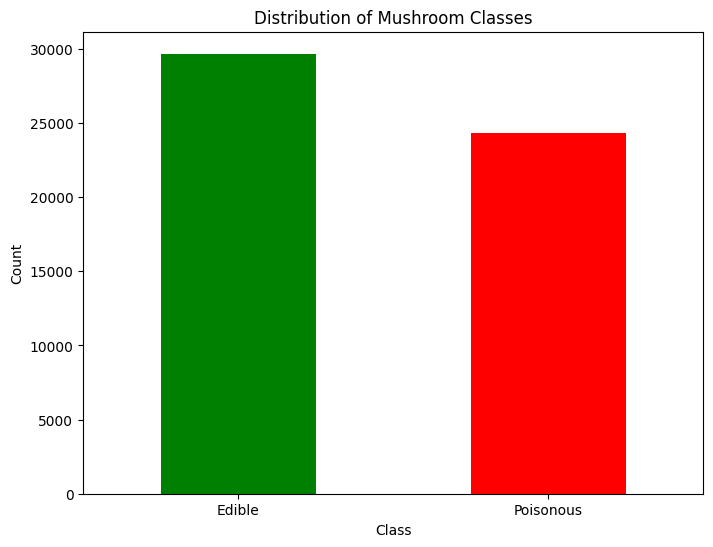

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['class'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Edible', 'Poisonous'], rotation=0)
plt.show()

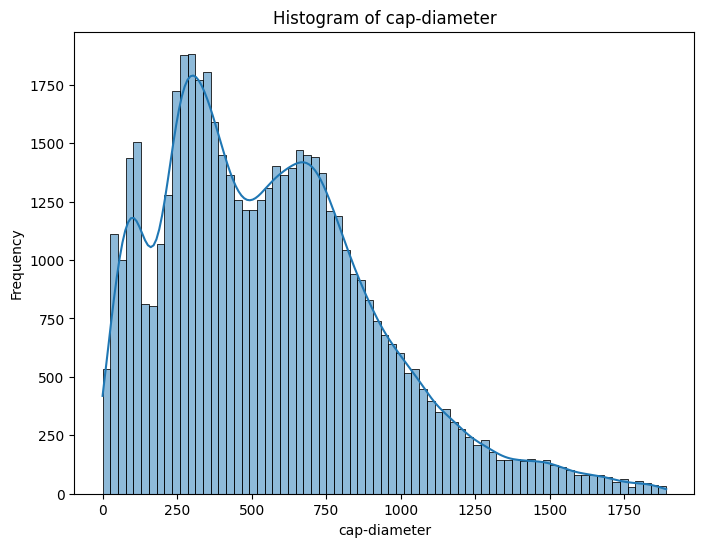

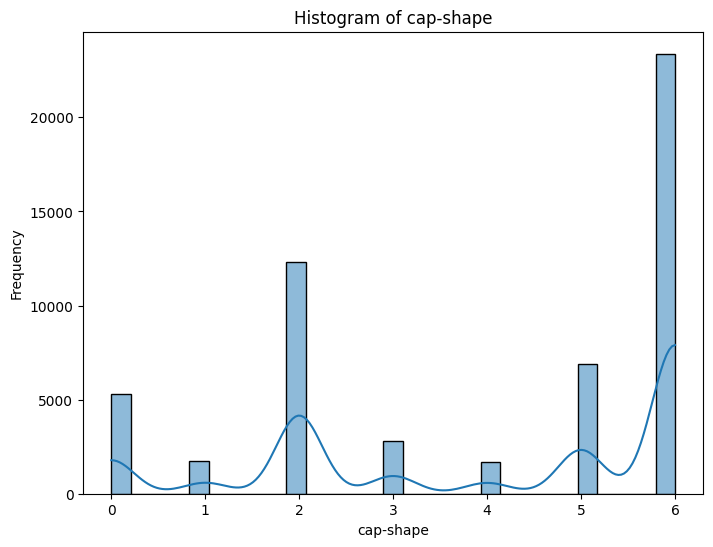

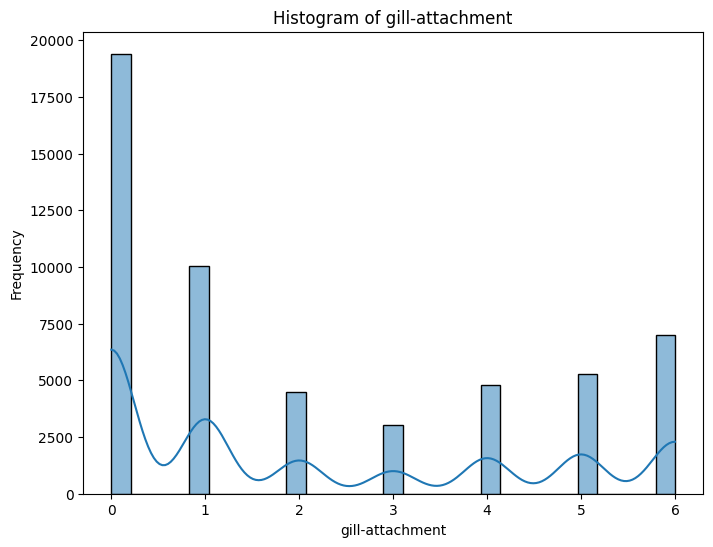

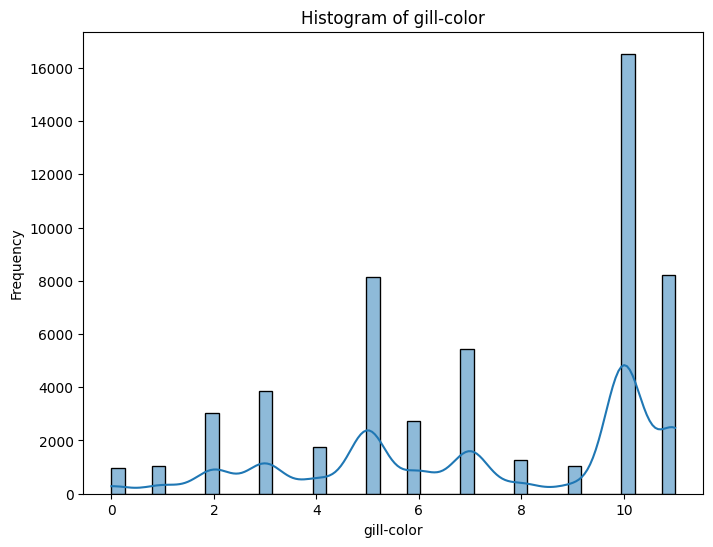

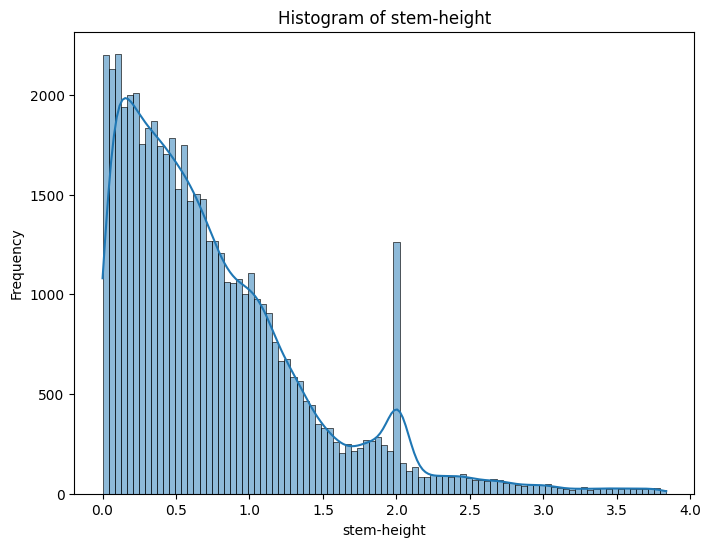

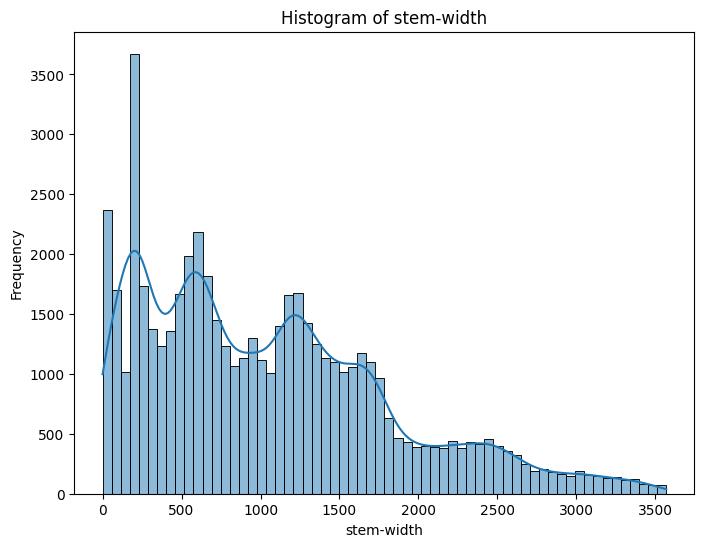

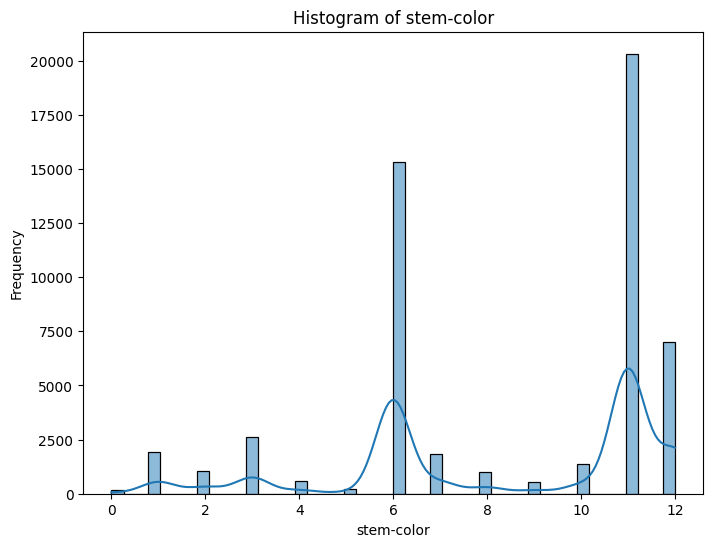

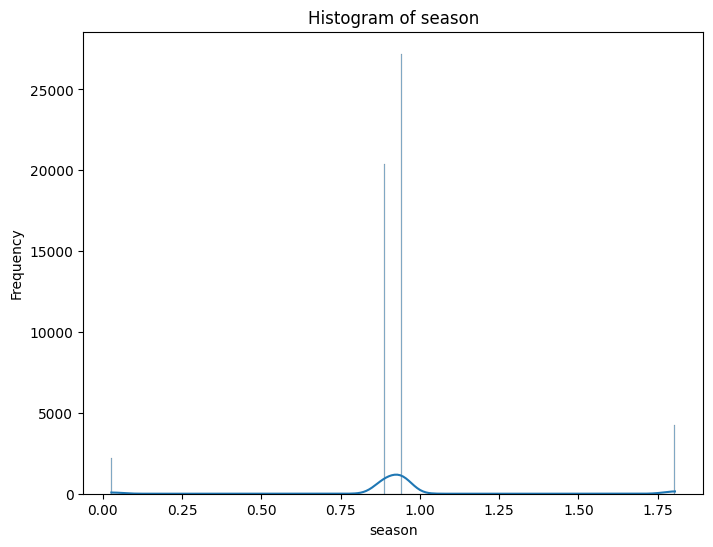

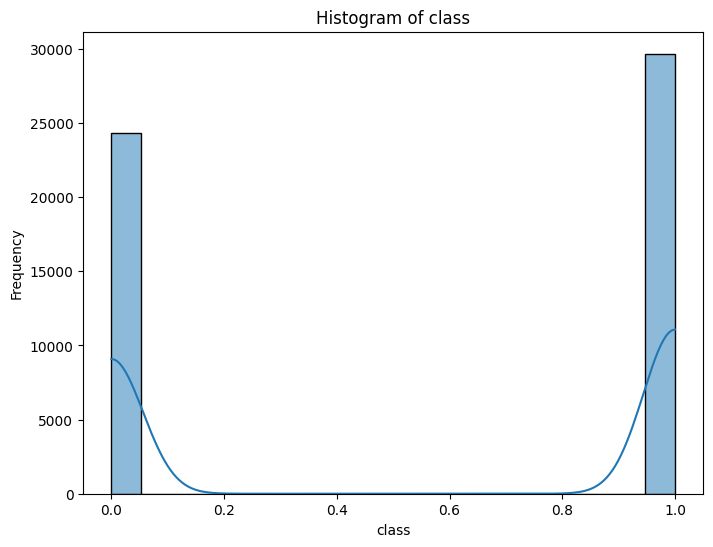

In [ ]:
import seaborn as sns

# Univariate Analysis
def univariate_analysis(df):
    # Plot histograms for each numerical feature
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=feature, kde=True)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

univariate_analysis(df)

In [ ]:
import seaborn as sns

# Univariate Analysis
def univariate_analysis(df):
    # Plot histograms for each numerical feature
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=feature, kde=True)
        plt.title(f'Histogram of {feature}')


        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

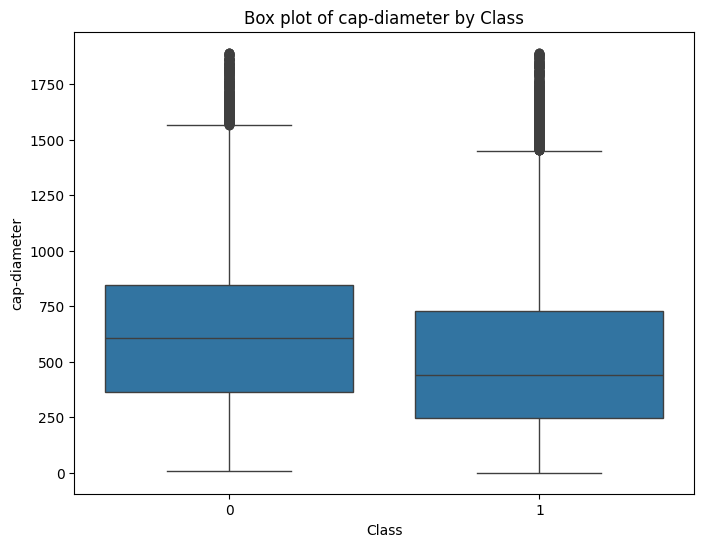

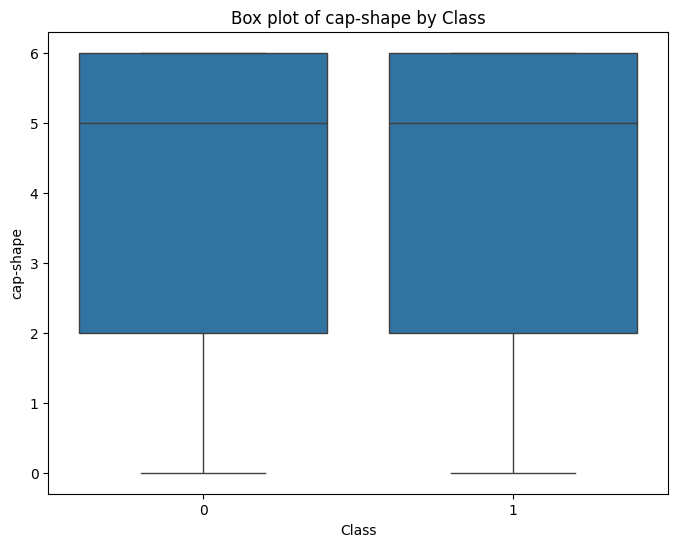

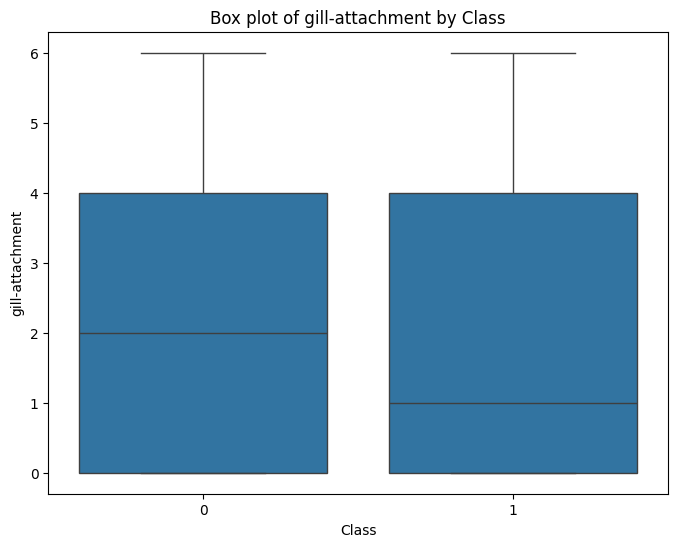

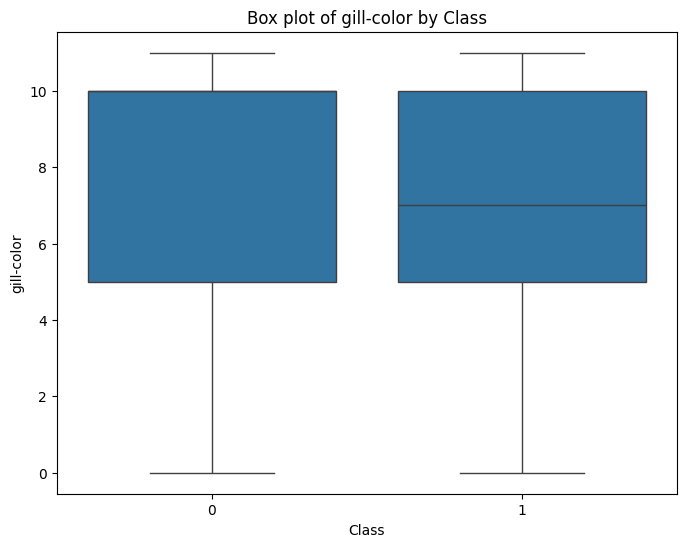

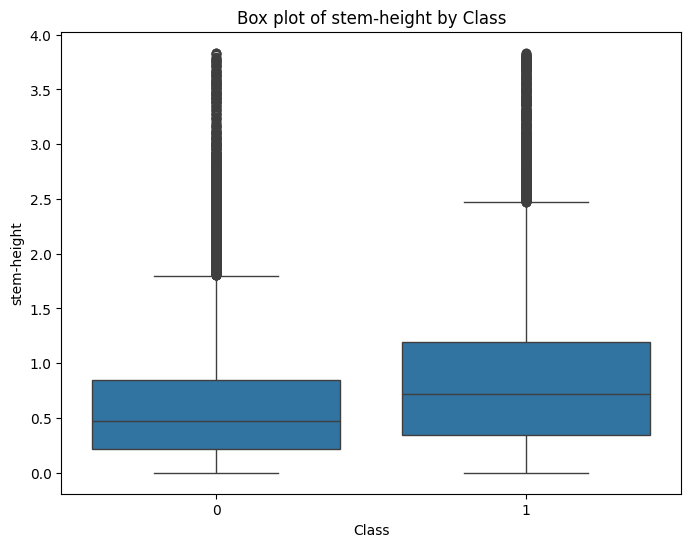

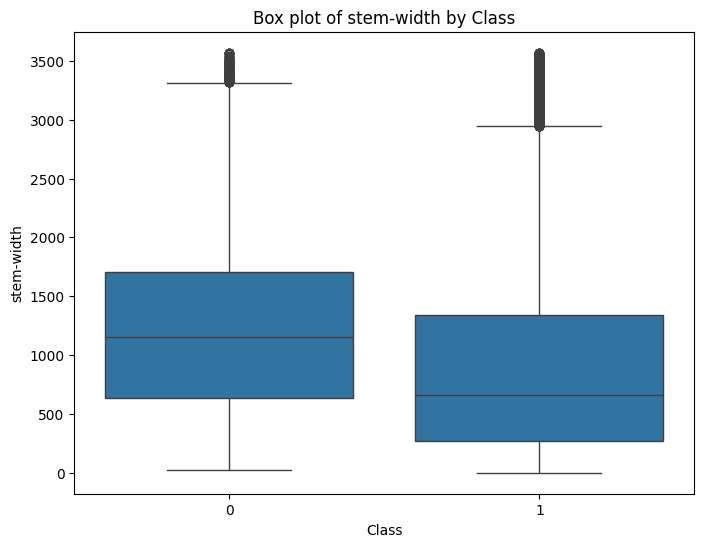

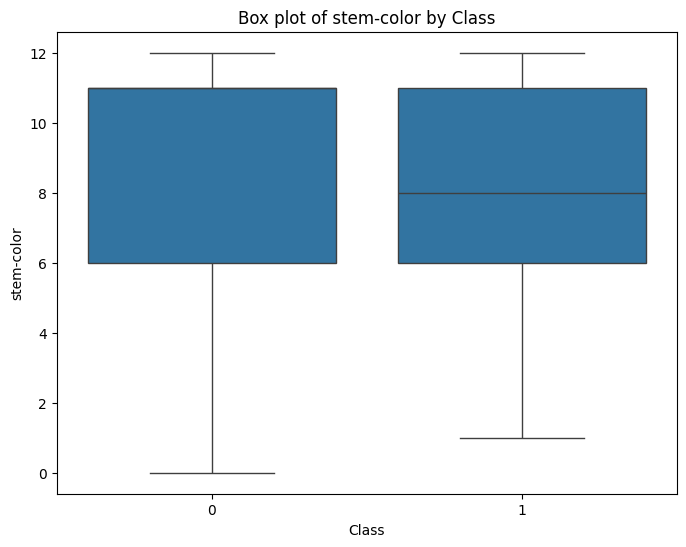

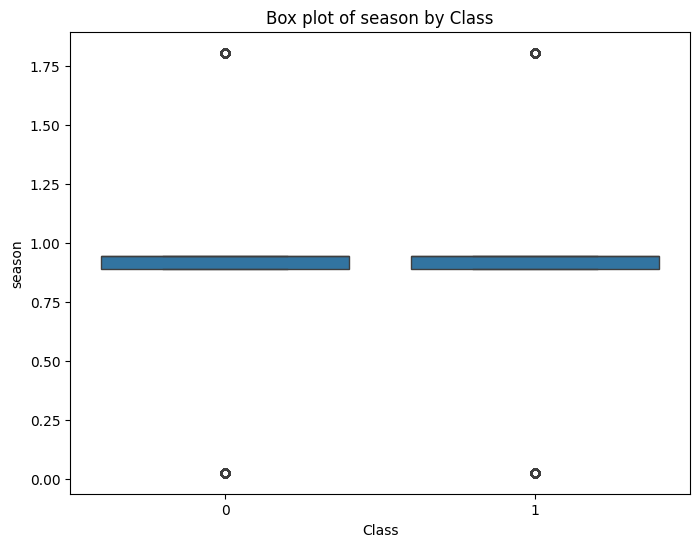

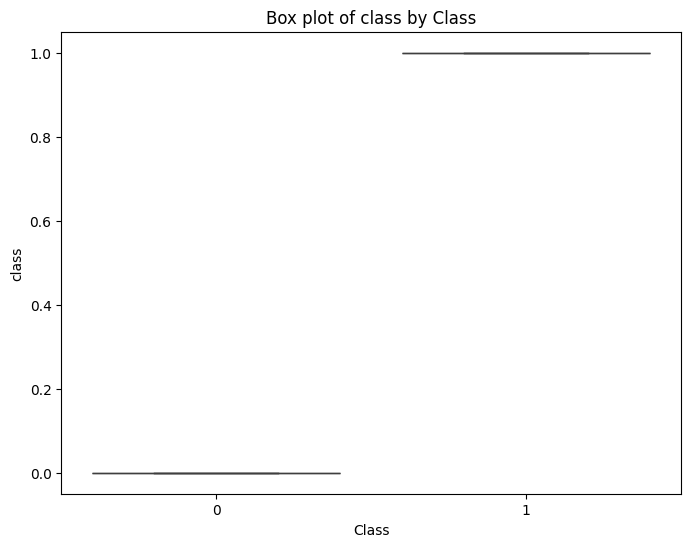

In [ ]:
def bivariate_analysis(df):
    # Plot box plots for each numerical feature against the target variable
  numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
  for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='class', y=feature)
    plt.title(f'Box plot of {feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.show()
bivariate_analysis(df)

In [ ]:
# data spliting (membagi data)
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
54030    1
54031    1
54032    1
54033    1
54034    1
Name: class, Length: 54035, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# ---INITIATE---
model = DecisionTreeClassifier()
# ---TRAIN---
model.fit(X_train, y_train)
# ---PRED---
# Make predictions on the testing data
predictions_DT = model.predict(X_test)
# ---EVALUATE---
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy_DT = accuracy_score(y_test, predictions_DT)
print("Accuracy:", accuracy_DT)

# Generate classification report
report_DT= classification_report(y_test, predictions_DT)
print("Classification Report:\n", report_DT)


Accuracy: 0.9781623022115296
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      4909
           1       0.98      0.98      0.98      5898

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807



In [ ]:
# modeling
predictions_DT

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43228 entries, 10135 to 15795
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     43228 non-null  int64  
 1   cap-shape        43228 non-null  int64  
 2   gill-attachment  43228 non-null  int64  
 3   gill-color       43228 non-null  int64  
 4   stem-height      43228 non-null  float64
 5   stem-width       43228 non-null  int64  
 6   stem-color       43228 non-null  int64  
 7   season           43228 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 3.0 MB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 43228 entries, 10135 to 15795
Series name: class
Non-Null Count  Dtype
--------------  -----
43228 non-null  int64
dtypes: int64(1)
memory usage: 675.4 KB


In [ ]:
#prediksi (semua ditambah dibagi yg kurang)
from sklearn.tree import DecisionTreeClassifier
# ---INITIATE---
model = DecisionTreeClassifier()
# ---TRAIN---
model.fit(X_train, y_train)
# ---PRED---
# Make predictions on the testing data
predictions_DT = model.predict(X_test)
# ---EVALUATE---
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy_DT = accuracy_score(y_test, predictions_DT)
print("Accuracy:", accuracy_DT)

# Generate classification report
report_DT= classification_report(y_test, predictions_DT)
print("Classification Report:\n", report_DT)

Accuracy: 0.977236976034052
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      4909
           1       0.98      0.98      0.98      5898

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807



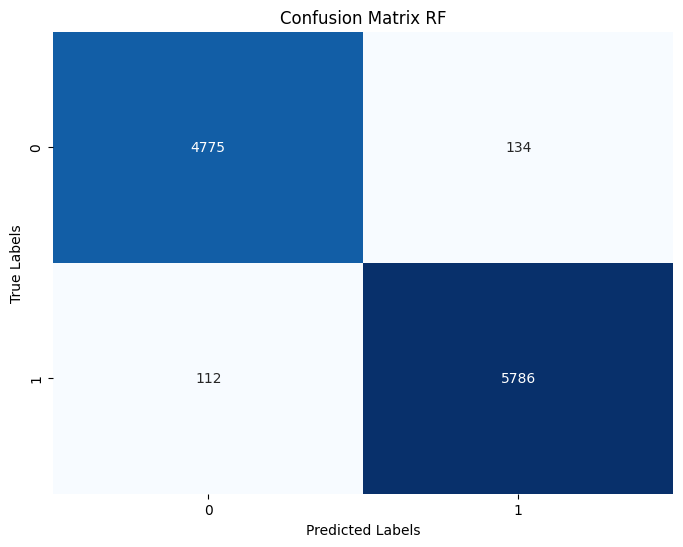

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_DT)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix RF")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

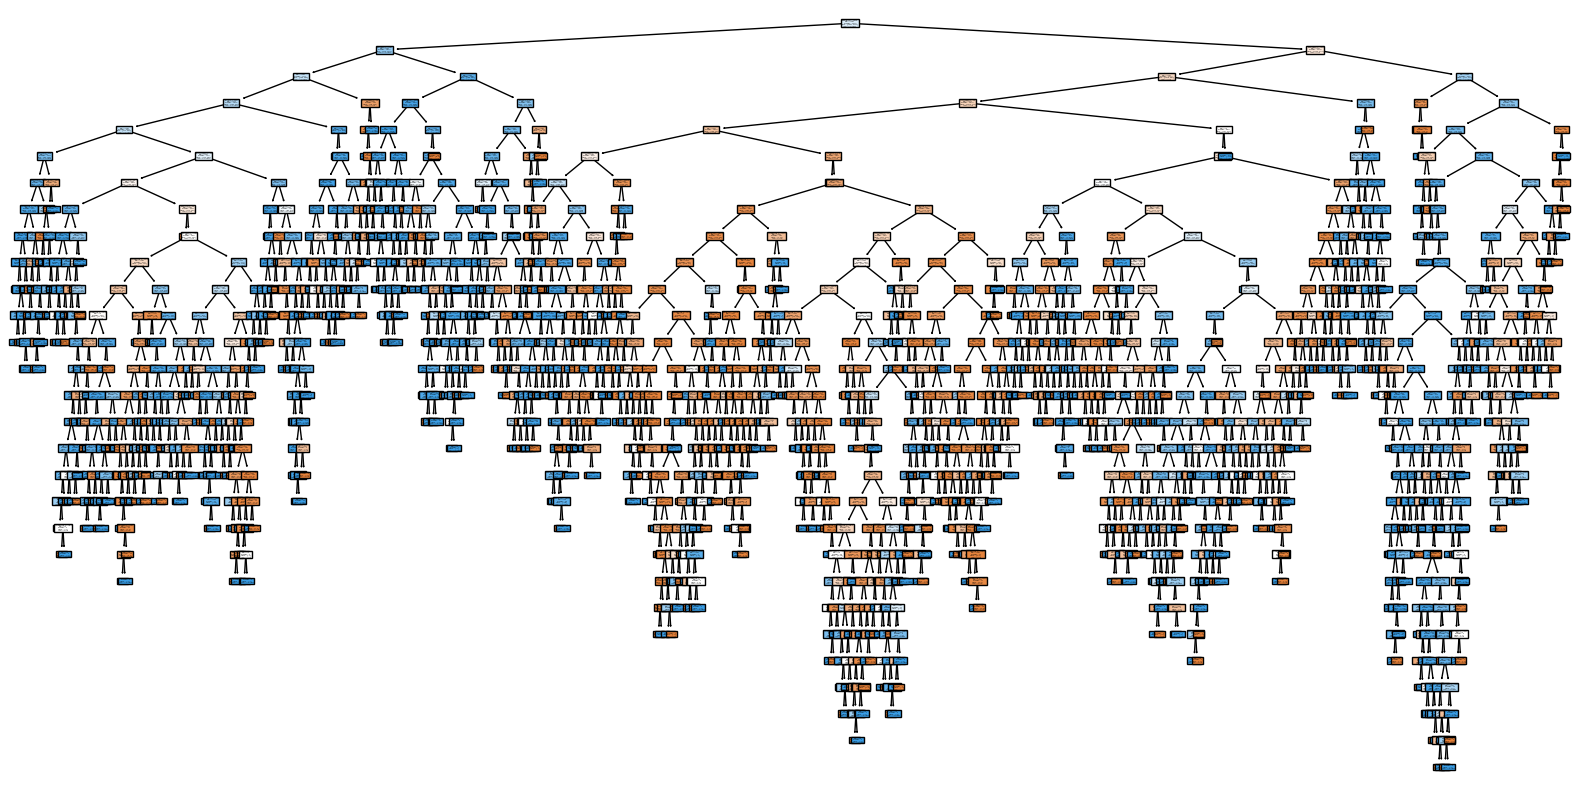

In [ ]:
    from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(model, X, df['class'], cv=5, scoring = 'accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)

Cross-Validation Scores: [0.53668918 0.4572962  0.51392616 0.54251874 0.59156103]
Mean Cross-Validation Score: 0.5283982603867863


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ---INITIATE---
logistic_model = LogisticRegression()

# ---TRAIN---
logistic_model.fit(X_train, y_train)

# ---PRED---
logistic_predictions = logistic_model.predict(X_test)

# ---EVALUATE---
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Model Accuracy:", logistic_accuracy)

# ---Another Evaluations---
logistic_report = classification_report(y_test, logistic_predictions)
print("Logistic Regression Model Classification Report:\n", logistic_report)

Logistic Regression Model Accuracy: 0.6389377255482558
Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.55      0.58      4909
           1       0.66      0.71      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.64      0.63      0.63     10807
weighted avg       0.64      0.64      0.64     10807



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,54035.0,567.257204,359.883763,0.000000,289.000000,525.000000,781.000000,1891.000000
cap-shape,54035.0,4.000315,2.160505,0.000000,2.000000,5.000000,6.000000,6.000000
gill-attachment,54035.0,2.142056,2.228821,0.000000,0.000000,1.000000,4.000000,6.000000
gill-color,54035.0,7.329509,3.200266,0.000000,5.000000,8.000000,10.000000,11.000000
stem-height,54035.0,0.759110,0.650969,0.000426,0.270997,0.593295,1.054858,3.835320
stem-width,54035.0,1051.081299,782.056076,0.000000,421.000000,923.000000,1523.000000,3569.000000
stem-color,54035.0,8.418062,3.262078,0.000000,6.000000,11.000000,11.000000,12.000000
season,54035.0,0.952163,0.305594,0.027372,0.888450,0.943195,0.943195,1.804273
class,54035.0,0.549181,0.497580,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Model Accuracy:", rf_accuracy)

# Generate classification report
rf_report = classification_report(y_test, rf_predictions)
print("Random Forest Classifier Model Classification Report:\n", rf_report)

Random Forest Classifier Model Accuracy: 0.9908392708429722
Random Forest Classifier Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, df['class'], cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)

Cross-Validation Scores: [0.56778014 0.48422319 0.56620709 0.48413066 0.60914222]
Mean Cross-Validation Score: 0.5422966595724993


In [ ]:
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to DataFrame if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['class'])

# Check the class distribution after oversampling
print(y_resampled_df['class'].value_counts())

class
1    29675
0    29675
Name: count, dtype: int64


In [ ]:
resampled_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [ ]:
import pandas as pd

# Load data
# Replace 'data.csv' with the actual file name of your data
data = resampled_data.copy()

# Define a function to remove outliers based on IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Specify columns for outlier removal (numeric columns only)
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Remove outliers
data_without_outliers = remove_outliers_iqr(data, numeric_columns)

data = data_without_outliers
data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
11,642,6,2,10,0.286062,1311,11,0.943195,1
12,814,4,2,10,1.189292,1681,11,0.943195,1
13,550,4,2,10,0.548675,1220,11,0.888450,1
14,606,6,2,10,0.254230,1239,11,0.943195,1
15,721,6,2,10,0.950553,1445,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
59343,492,4,2,10,0.369774,1372,11,0.943195,0
59344,446,6,6,10,0.863065,883,11,0.886890,0
59347,836,6,0,10,0.054644,1553,11,0.888944,0
59348,583,6,4,3,1.717779,2252,11,0.943195,0


from matplotlib import pyplot as plt
data['cap-diameter'].plot(kind='hist', bins=20, title='cap-diameter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['cap-shape'].plot(kind='hist', bins=20, title='cap-shape')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['gill-attachment'].plot(kind='hist', bins=20, title='gill-attachment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['gill-color'].plot(kind='hist', bins=20, title='gill-color')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='cap-diameter', y='cap-shape', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='cap-shape', y='gill-attachment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='gill-attachment', y='gill-color', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='gill-color', y='stem-height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['cap-diameter'].plot(kind='line', figsize=(8, 4), title='cap-diameter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['cap-shape'].plot(kind='line', figsize=(8, 4), title='cap-shape')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['gill-attachment'].plot(kind='line', figsize=(8, 4), title='gill-attachment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['gill-color'].plot(kind='line', figsize=(8, 4), title='gill-color')
plt.gca().spines[['top', 'right']].set_visible(False)

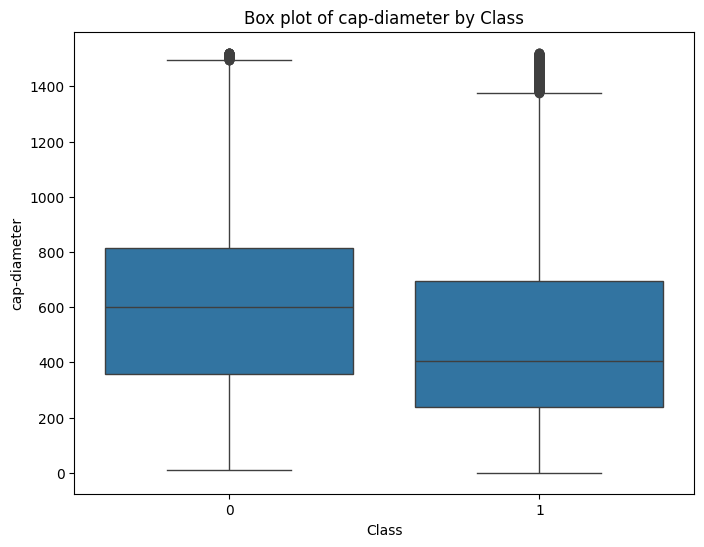

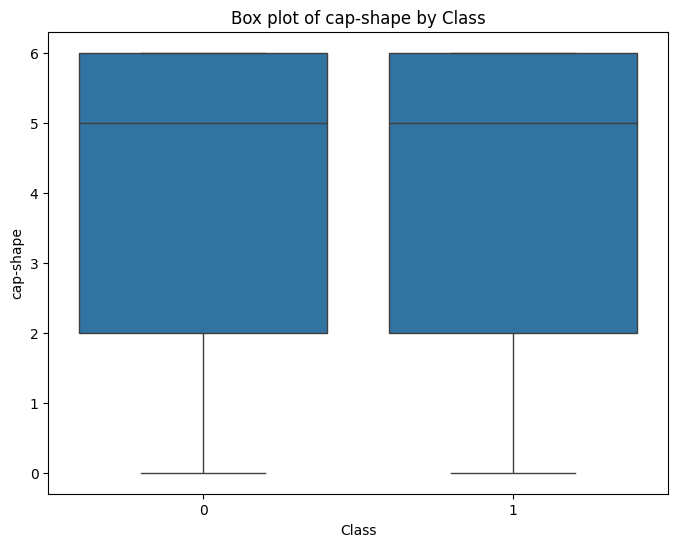

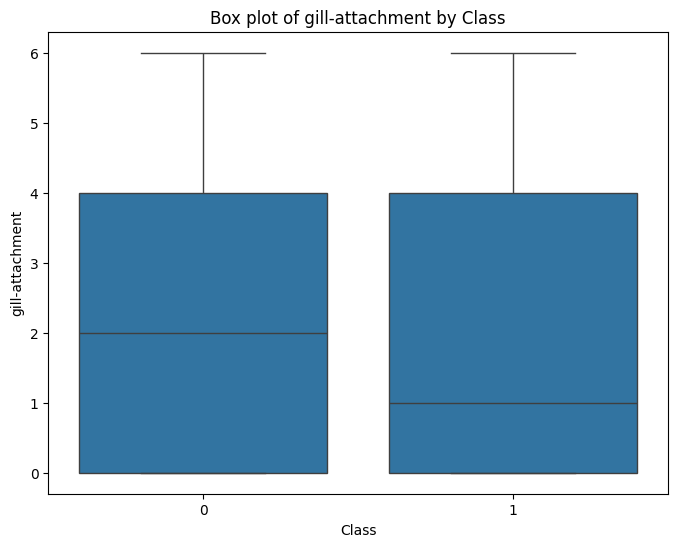

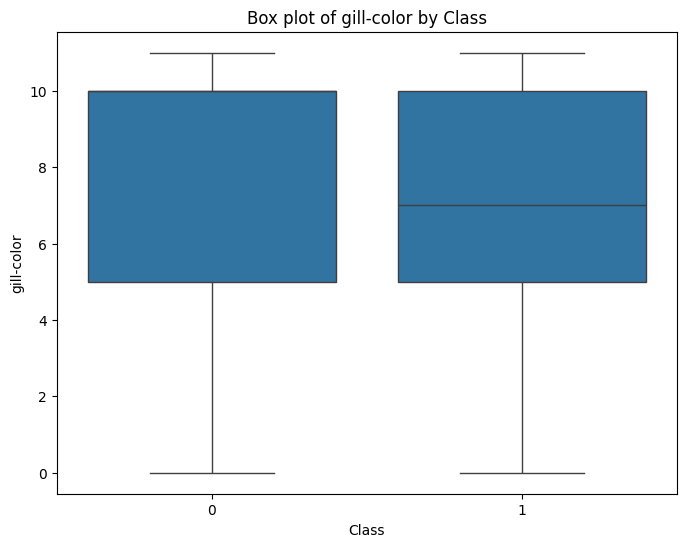

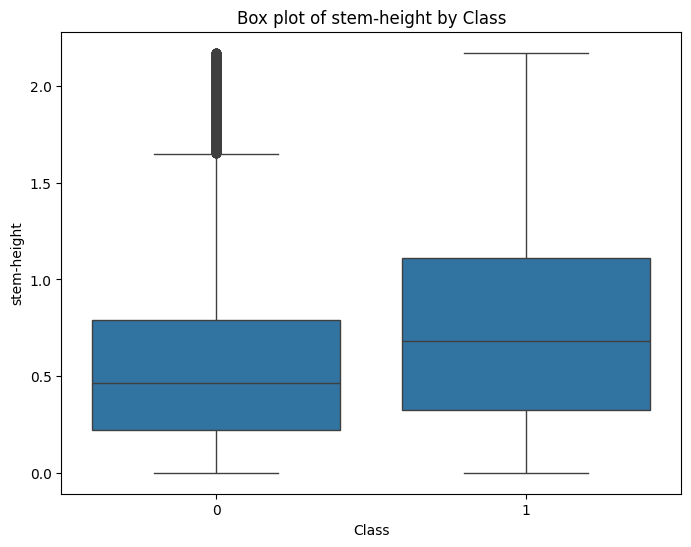

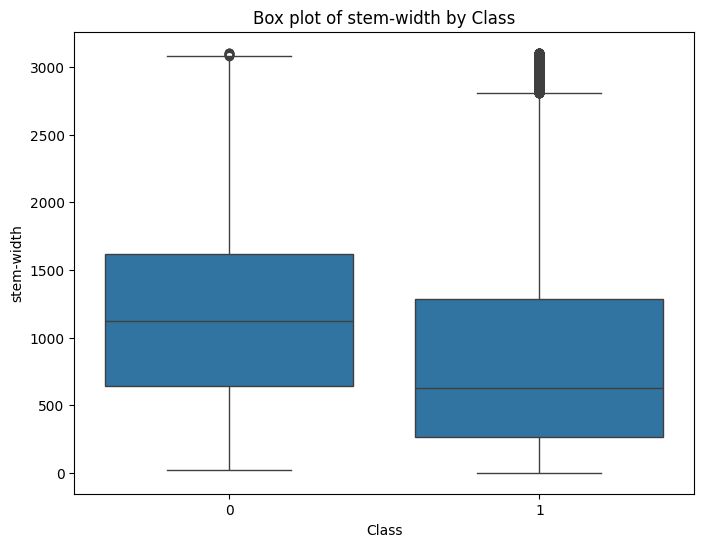

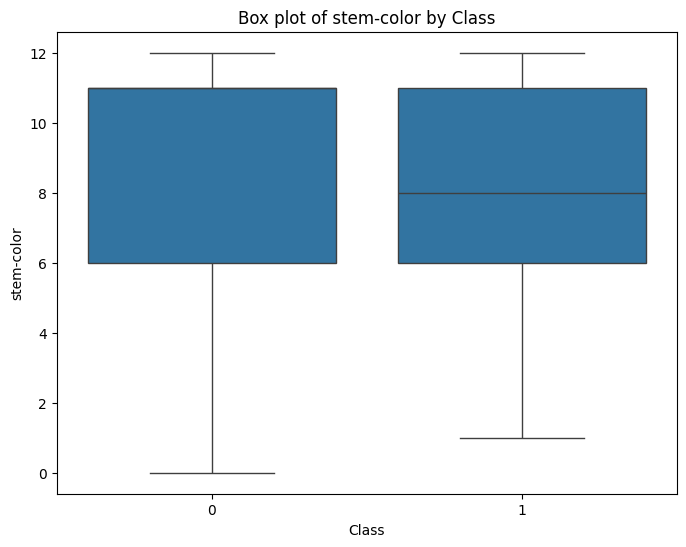

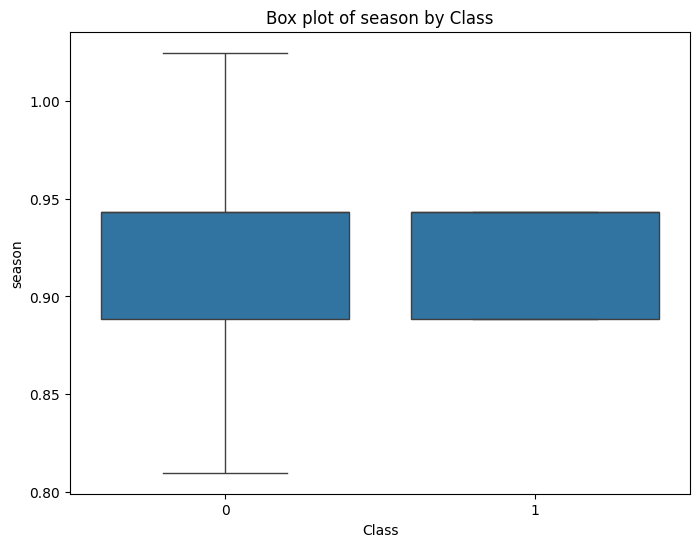

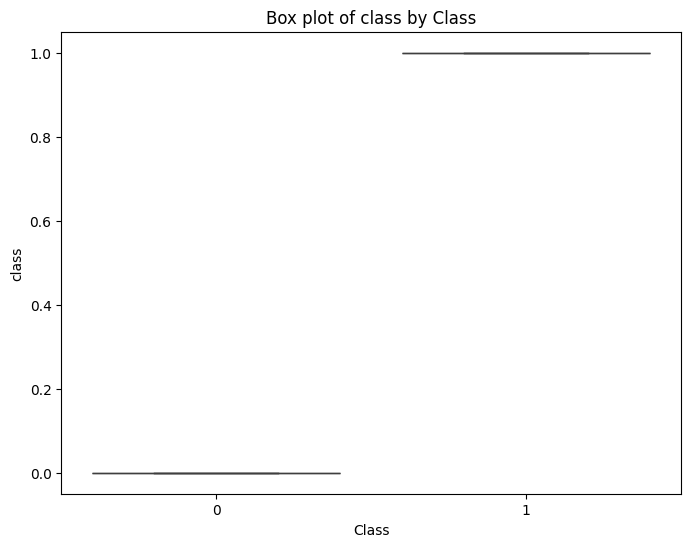

In [ ]:
bivariate_analysis(data)

In [ ]:
X= data.drop('class', axis=1)
# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# ---INITIATE---
model = DecisionTreeClassifier()
# ---TRAIN---
model.fit(X_train_scaled, y_train)
# ---PRED---
# Make predictions on the testing data
predictions_DT = model.predict(X_test_scaled)
# ---EVALUATE---
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy_DT = accuracy_score(y_test, predictions_DT)
print("Accuracy:", accuracy_DT)

# Generate classification report
report_DT= classification_report(y_test, predictions_DT)
print("Classification Report:\n", report_DT)

Accuracy: 0.9778847043582863
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      4909
           1       0.98      0.98      0.98      5898

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807



In [ ]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(model, X, data['class'], cv=5, scoring = 'accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)

Cross-Validation Scores: [0.69324394 0.61670964 0.67230531 0.59804023 0.66787004]
Mean Cross-Validation Score: 0.649633831872099


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, data['class'], cv=5, scoring = 'accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)
print("Logistic Regression Model Classification Report:\n", logistic_report)

Cross-Validation Scores: [0.71387313 0.6612687  0.73037648 0.66003094 0.67209902]
Mean Cross-Validation Score: 0.6875296544610624
Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.55      0.58      4909
           1       0.66      0.71      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.64      0.63      0.63     10807
weighted avg       0.64      0.64      0.64     10807



In [ ]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(model, X, data['class'], cv=5, scoring = 'accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)

Cross-Validation Scores: [0.69087158 0.60825168 0.68117586 0.61175864 0.63104693]
Mean Cross-Validation Score: 0.6446209386281588


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, data['class'], cv=5, scoring = 'accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)

Cross-Validation Scores: [0.71294482 0.66075297 0.72418773 0.65920578 0.68313564]
Mean Cross-Validation Score: 0.6880453842186695


In [ ]:
from sklearn.model_selection import GridSearchCV
# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

# Fit the GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# If needed, you can access the best estimator
best_rf_model = grid_search.best_estimator_

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores with Best Estimator:", cv_scores)

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score with Best Estimator:", mean_cv_score)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

# Fit the GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 